In [1]:
# Importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')
from classes.fbref import FBRef

## Here we will compare the top teams in LaLiga:
In LaLiga we will grab Real Madrid, Barcelona and Atlético Madrid.

In [3]:
data = FBRef()

## We will group each team in a Panda dataset:

In [4]:
laliga = data.get_hdf5('laliga_j2.h5', 'laliga_j2')

#### Extract Teams: 

In [5]:
madrid = laliga['Jornada 2']['Real Madrid']['Away']['Away']
barcelona = laliga['Jornada 2']['Barcelona']['Home']['Home']
atletico = laliga['Jornada 2']['Atletico']['Away']['Away']

### Basic Stuff:
team_names = ['Real Madrid', 'Barcelona', 'Atletico Madrid']
color_codes = ['#11875d', '#014182', '#9a0200']

#### Let's make the passes metric of the weekend: 

In [6]:
### Passes
rows_passes = [('Unnamed: 0_level_0', 'Player'), ('Unnamed: 3_level_0', 'Pos'), ('Unnamed: 5_level_0', 'Min'), ('Total', 'Cmp'), ('Total', 'Att'), ('Total', 'Cmp%'), ('Unnamed: 22_level_0', 'xA'), ('Unnamed: 27_level_0', 'PrgP'), ('Player ID', '')]

#### List of positions
cm_list = ['CM', 'LM', 'RM', 'DM', 'AM']

In [7]:
### Save each team with it's pair
madrid_passes = data.structure_passing(rows_passes, cm_list, madrid)
barcelona_passes = data.structure_passing(rows_passes, cm_list, barcelona)
atletico_passes = data.structure_passing(rows_passes, cm_list, atletico)

### Recap Data:

In [8]:
## Data
data_passes = [madrid_passes, barcelona_passes, atletico_passes]
laliga_passes = data.league_panda(data_passes, team_names, color_codes)

### Scatter the data:

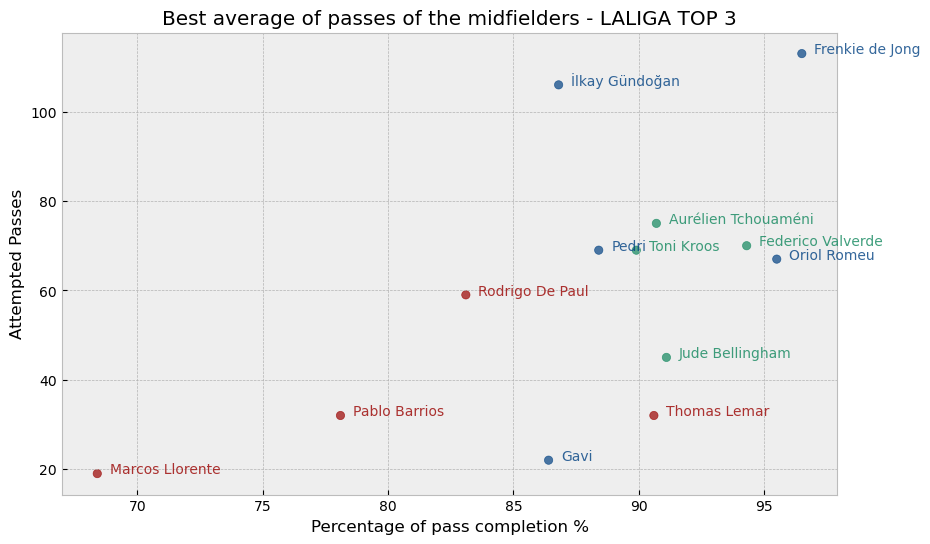

In [9]:
## Style plot
plt.style.use('bmh')

# PLOT 
plt.figure(figsize=(10, 6))

data.scatter_match(laliga_passes[('Total', 'Cmp%')].values, laliga_passes[('Total', 'Att')].values, laliga_passes[('Unnamed: 0_level_0', 'Player')].values, laliga_passes['ColorCode'].values, distance=0.5, size=10)

#### Competition
league = 'LALIGA TOP 3'

#### styles:
plt.title(f'Best average of passes of the midfielders - {league}')
plt.xlabel('Percentage of pass completion %')
plt.ylabel('Attempted Passes')
plt.grid(True)

## Plot the xG/xA

In [10]:
## disable error
pd.options.mode.chained_assignment = None
### Rows danger
rows_shots = ['Player', 'xG', 'Pos', 'Min', 'Player ID']
### Attack positions:
attack_list = ['CM', 'LM', 'RM', 'DM', 'AM', 'FW', 'LW', 'RW']

In [11]:
#### LALIGA
madrid_att = data.attack_structure(rows_shots, attack_list, madrid)
barcelona_att = data.attack_structure(rows_shots, attack_list, barcelona)
atletico_att = data.attack_structure(rows_shots, attack_list, atletico)

## Recap Data: 

In [13]:
## Recap
data_att = [madrid_att, barcelona_att, atletico_att]
laliga_att = data.league_panda(data_att, team_names, color_codes)

laliga_att

,Player,xG,Pos,Min,Player ID,xA,team,ColorCode
0,Vinicius Júnior,0.2,FW,89,7111d552,0.2,Real Madrid,#11875d
1,Rodrygo,0.3,FW,71,8f5e92a6,0.1,Real Madrid,#11875d
2,Jude Bellingham,0.7,"AM,FW",80,57d88cf9,0.2,Real Madrid,#11875d
3,Federico Valverde,0.2,RM,89,0959c2a2,0.2,Real Madrid,#11875d
4,Pedri,0.9,"AM,DM",90,0d9b2d31,0.3,Barcelona,#014182
5,İlkay Gündoğan,0.1,"CM,DM",90,819b3158,0.9,Barcelona,#014182
6,Oriol Romeu,0.4,CM,78,4b511457,0.1,Barcelona,#014182
7,Lamine Yamal,0.3,"WB,RW",84,82ec26c1,0.2,Barcelona,#014182
8,Antoine Griezmann,0.1,FW,90,df69b544,0.1,Atletico Madrid,#9a0200


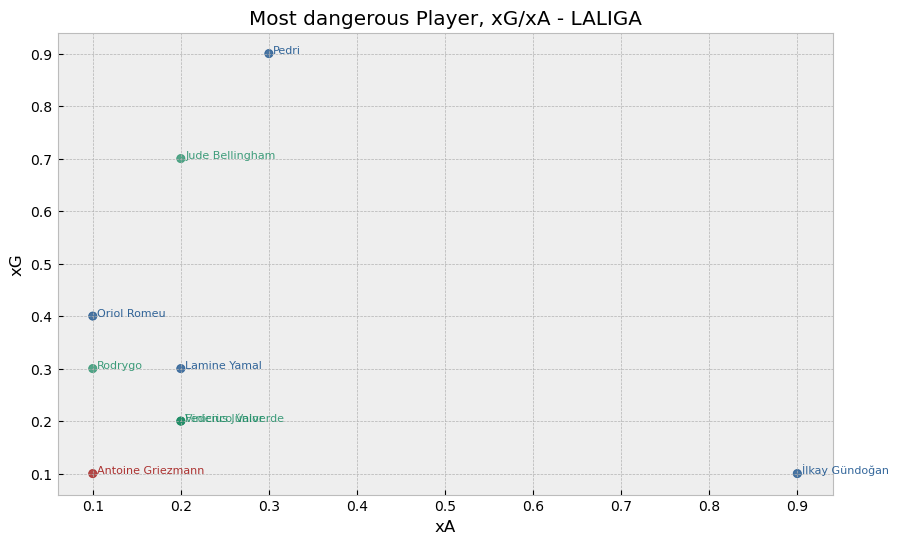

In [16]:
## Style plot
plt.style.use('bmh')

#PLOT
plt.figure(figsize=(10, 6))

data.scatter_match(laliga_att['xA'].values, laliga_att['xG'].values, laliga_att['Player'].values, laliga_att['ColorCode'].values, distance=0.005, size=10)

#### COMPETITION
league = 'LALIGA'

#### STYLES:
plt.title(f'Most dangerous Player, xG/xA - {league}')
plt.xlabel('xA')
plt.ylabel('xG')
plt.grid(True)